In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/segmented-bob-ross-images/labels.csv
/kaggle/input/segmented-bob-ross-images/train/labels/painting254.png
/kaggle/input/segmented-bob-ross-images/train/labels/painting147.png
/kaggle/input/segmented-bob-ross-images/train/labels/painting359.png
/kaggle/input/segmented-bob-ross-images/train/labels/painting321.png
/kaggle/input/segmented-bob-ross-images/train/labels/painting300.png
/kaggle/input/segmented-bob-ross-images/train/labels/painting171.png
/kaggle/input/segmented-bob-ross-images/train/labels/painting10.png
/kaggle/input/segmented-bob-ross-images/train/labels/painting390.png
/kaggle/input/segmented-bob-ross-images/train/labels/painting411.png
/kaggle/input/segmented-bob-ross-images/train/labels/painting338.png
/kaggle/input/segmented-bob-ross-images/train/labels/painting369.png
/kaggle/input/segmented-bob-ross-images/train/labels/painting337.png
/kaggle/input/segmented-bob-ross-images/train/labels/painting230.png
/kaggle/input/segmented-bob-ross-images/train/labels/

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
data = pd.read_csv('/kaggle/input/segmented-bob-ross-images/labels.csv')
data.head()

,Id,class
0,3,sky
1,5,tree
2,10,grass
3,14,earth;rock
4,17,mountain;mount


In [5]:
data.columns

Index(['Id', 'class'], dtype='object')

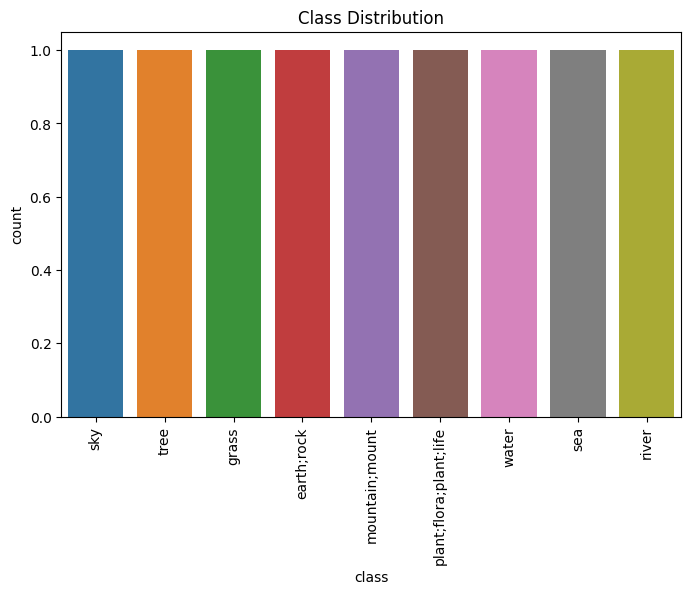

In [6]:
# Class distribution
plt.figure(figsize=(8,5))
sns.countplot(x='class', data=data, order=data['class'].value_counts().index)
plt.title("Class Distribution")
plt.xticks(rotation=90)
plt.show()

In [7]:
# Encode classes
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])

# Features & Target
X = data[['Id']]      # Using Id as numeric feature (demo)
y = data['class']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
y_pred = model.predict(X_test)

# Accuracy
score = accuracy_score(y_test, y_pred)
print(f"\n✅ Logistic Regression Accuracy: {score:.4f}")


✅ Logistic Regression Accuracy: 0.0000


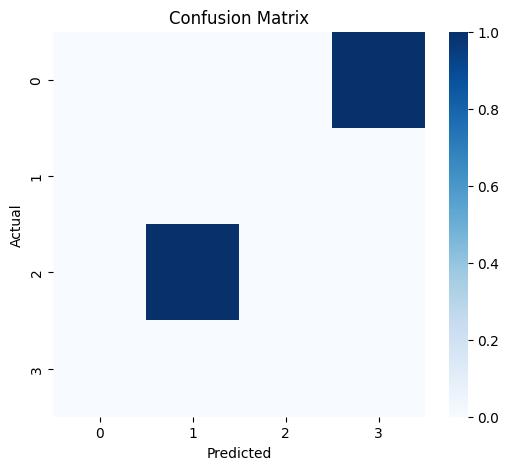

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

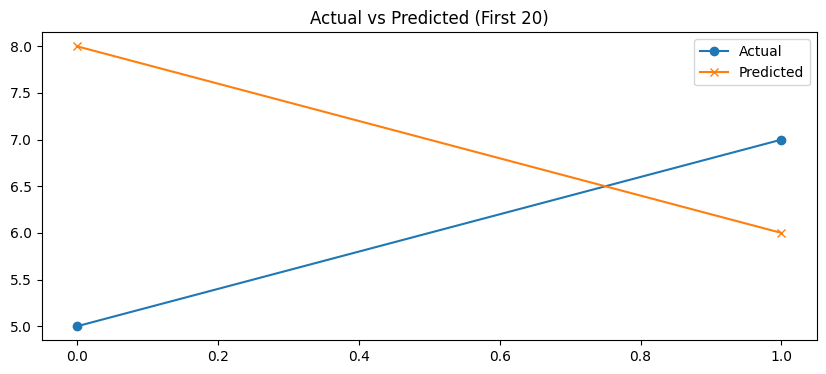

In [12]:
# Compare first 20 predictions
plt.figure(figsize=(10,4))
plt.plot(y_test.values[:20], label='Actual', marker='o')
plt.plot(y_pred[:20], label='Predicted', marker='x')
plt.title("Actual vs Predicted (First 20)")
plt.legend()
plt.show()